In [ ]:
import pandas as pd
import time
import numpy as np
import seaborn as sns
import shap as shap
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report
import matplotlib.pyplot as plt

In [ ]:
df = pd.read_csv('datasets/preprocessed_final.csv')

In [ ]:
X = df.drop(columns=['STAT_CAUSE_DESCR', 'STAT_CAUSE_CODE','Citizen', 'Non-Citizen', 'White', 'Black', 'Hispanic', 'Asian', 'American India0laska Native', 'Native Hawaiian/Other Pacific Islander', 'Multiple Races', 'Smoke everyday', 'Smoke some days', 'Former smoker', 'Never smoked', 'Children 0-18', 'Adults 19-25', 'Adults 26-34', 'Adults 35-54', 'Adults 55-64', '65+', 'Total', 'AK', 'AL', 'AR', 'AZ', 'CA', 'CO', 'CT', 'DC', 'DE', 'FL', 'GA', 'HI', 'IA', 'ID', 'IL', 'IN', 'KS', 'KY', 'LA', 'MA', 'MD', 'ME', 'MI', 'MN', 'MO', 'MS', 'MT', 'NC', 'ND', 'NE', 'NH', 'NJ', 'NM', 'NV', 'NY', 'OH', 'OK', 'OR', 'PA', 'PR', 'RI', 'SC', 'SD', 'TN', 'TX', 'UT', 'VA', 'VT', 'WA', 'WI', 'WV', 'WY', 'BIA', 'BLM', 'BOR', 'FOREIGN', 'FWS', 'MISSING/NOT SPECIFIED', 'MUNICIPAL/LOCAL', 'NPS', 'OTHER FEDERAL', 'PRIVATE', 'STATE OR PRIVATE', 'TRIBAL', 'UNDEFINED FEDERAL', 'USFS', 'New Bedford', 'Smoke everyday number', 'Smoke some days number', 'Former smoker number', 'Never smoked number','Pan_evaporation'])
y = df['STAT_CAUSE_DESCR']
X_train, X_test, y_train, y_test = train_test_split(X, y)

In [ ]:
feature_names = [col for col in X.columns]
rf = RandomForestClassifier(random_state=0, n_jobs=-1)
rf.fit(X_train, y_train)

RandomForestClassifier(n_jobs=-1, random_state=0)

In [ ]:
print([col for col in df.columns])

['DISCOVERY_DOY', 'STAT_CAUSE_CODE', 'STAT_CAUSE_DESCR', 'FIRE_SIZE', 'LATITUDE', 'LONGITUDE', 'DAY', 'MONTH', 'YEAR', 'JULY4', 'C_DATE_EXISTS', 'EXISTS_TIMES', 'HOUR', 'C_HOUR', 'DURATION_DAYS', 'DURATION_HOURS', 'DUR_30M', 'DUR_1H', 'DUR_1D', 'population density', 'distance_to_rails', 'distance_to_powerline', 'distance_to_landfill', 'home_parks_distance', 'public_school_distance', 'city_distance', 'max_temp', 'min_temp', 'prcp', 'Pan_evaporation', 'avg_temp', 'fire_class_ordinal', 'Citizen', 'Non-Citizen', 'White', 'Black', 'Hispanic', 'Asian', 'American India0laska Native', 'Native Hawaiian/Other Pacific Islander', 'Multiple Races', 'Smoke everyday', 'Smoke some days', 'Former smoker', 'Never smoked', 'Children 0-18', 'Adults 19-25', 'Adults 26-34', 'Adults 35-54', 'Adults 55-64', '65+', 'Total', 'AK', 'AL', 'AR', 'AZ', 'CA', 'CO', 'CT', 'DC', 'DE', 'FL', 'GA', 'HI', 'IA', 'ID', 'IL', 'IN', 'KS', 'KY', 'LA', 'MA', 'MD', 'ME', 'MI', 'MN', 'MO', 'MS', 'MT', 'NC', 'ND', 'NE', 'NH', 'NJ

# Feature importance based on mean decrease in impurity

In [ ]:
start_time = time.time()
importances = rf.feature_importances_
std = np.std([tree.feature_importances_ for tree in rf.estimators_], axis=0)
elapsed_time = time.time() - start_time

print(f"Elapsed time to compute the importances: {elapsed_time:.3f} seconds")

Elapsed time to compute the importances: 0.047 seconds


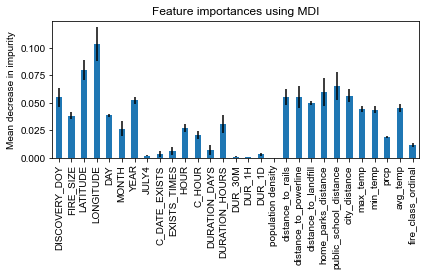

In [ ]:
forest_importances = pd.Series(importances, index=feature_names)
fig, ax = plt.subplots()
forest_importances.plot.bar(yerr=std, ax=ax)
ax.set_title("Feature importances using MDI")
ax.set_ylabel("Mean decrease in impurity")
sns.set(rc={'figure.figsize':(15,8)}, font_scale=1)
fig.tight_layout()

<AxesSubplot:>

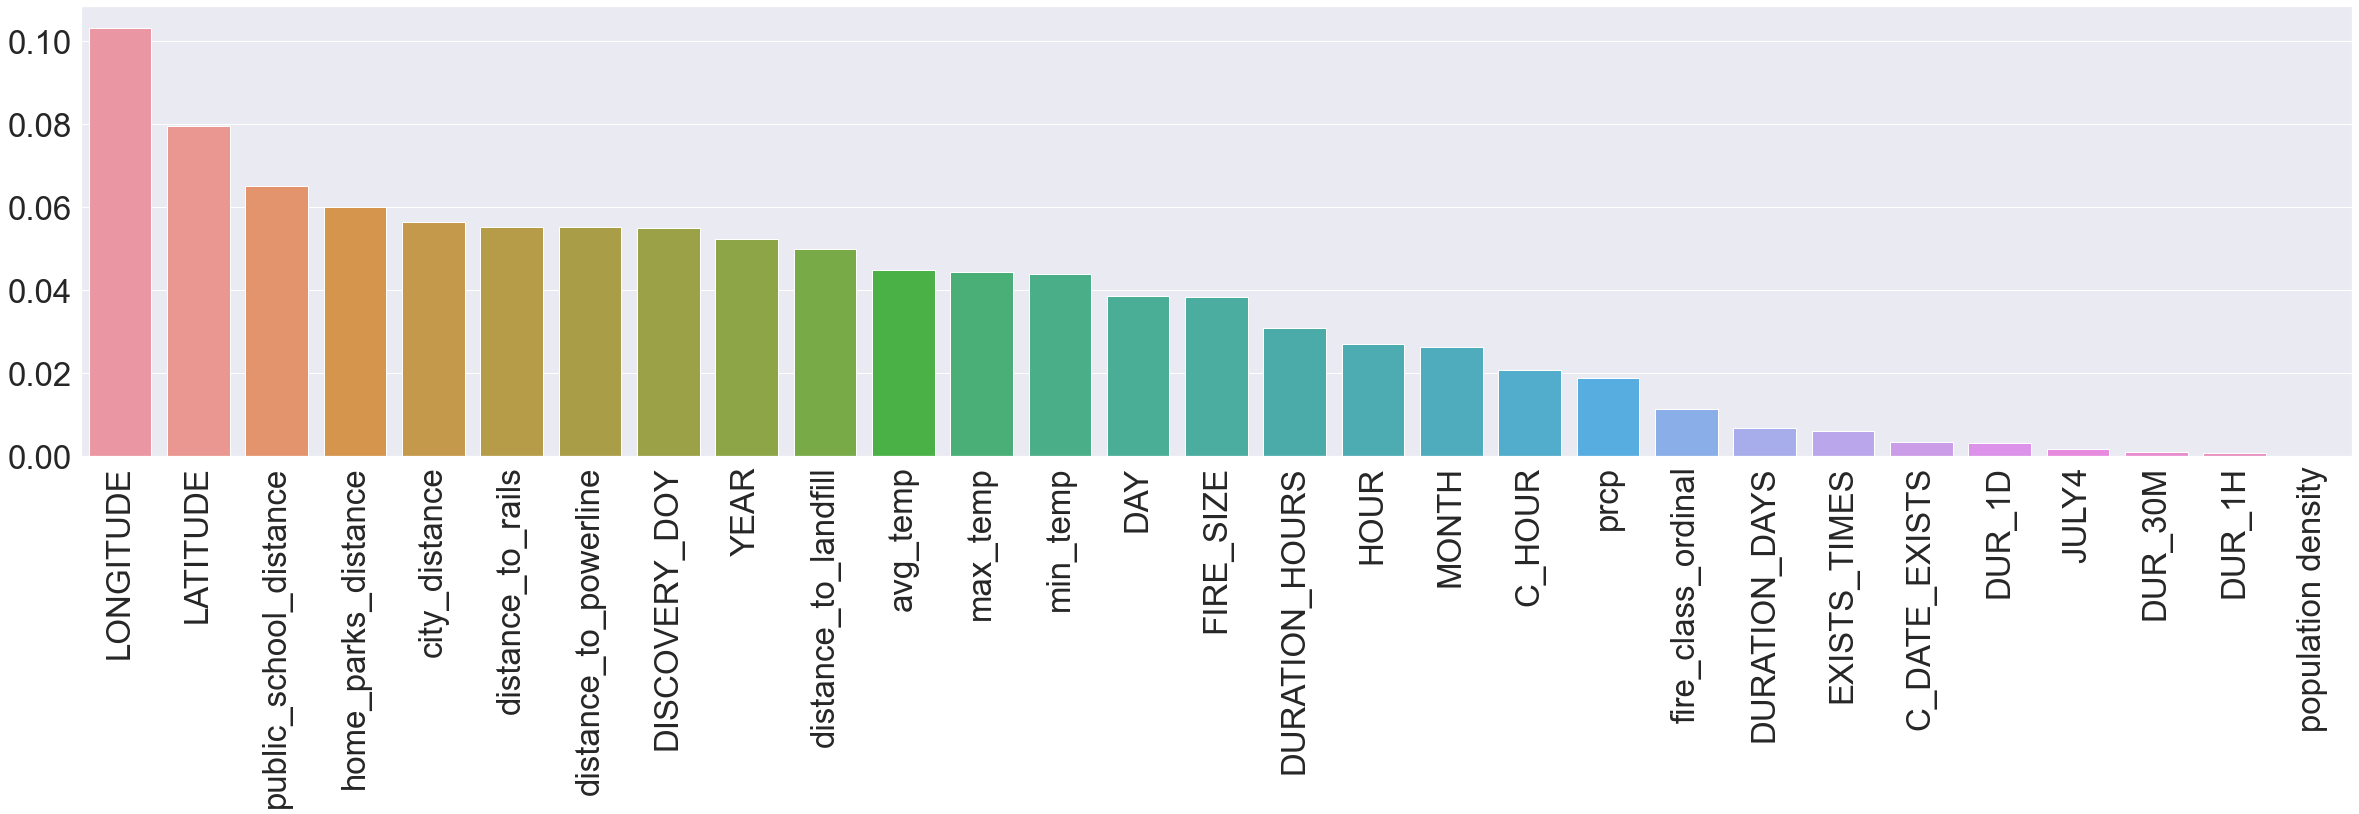

In [ ]:
feature_importances = sorted(list(zip(X_train.columns, rf.feature_importances_)), key=lambda x: -x[1])
columns = list(list(zip(*feature_importances))[0])
importances = list(list(zip(*feature_importances))[1])
sns.set(rc={'figure.figsize':(40.7,8.27)}, font_scale=3)
plt.xticks(rotation=90)
sns.barplot(x=columns, y=importances)

# Feature importance based on feature permutation

In [ ]:
from sklearn.inspection import permutation_importance

start_time = time.time()
result = permutation_importance(rf, X_test, y_test, n_repeats=10, random_state=1)
elapsed_time = time.time() - start_time
print(f"Elapsed time to compute the importances: {elapsed_time:.3f} seconds")

forest_importances = pd.Series(result.importances_mean, index=feature_names)

Elapsed time to compute the importances: 59.591 seconds


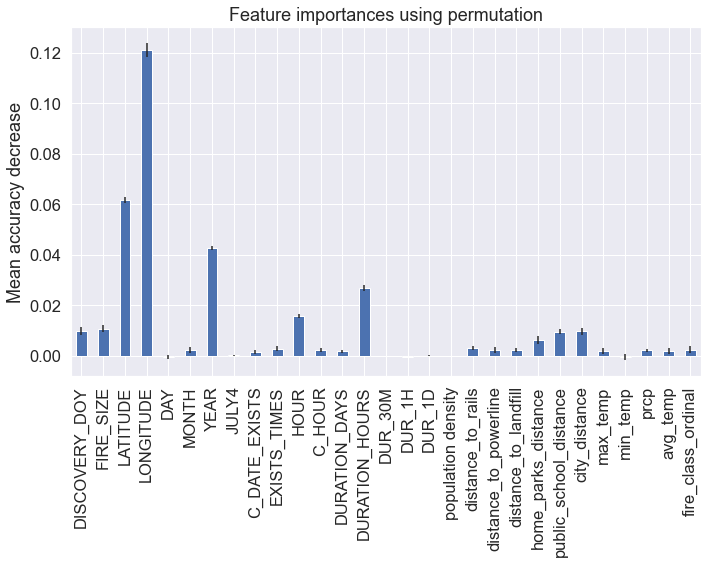

In [ ]:
fig, ax = plt.subplots()
forest_importances.plot.bar(yerr=result.importances_std, ax=ax)
ax.set_title("Feature importances using permutation")
ax.set_ylabel("Mean accuracy decrease")
sns.set(rc={'figure.figsize':(10,8)}, font_scale=1)
fig.tight_layout()
plt.show()

In [ ]:
preds = rf.predict(X_test)
print(classification_report(y_test, preds))

C:\Users\97250\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


                   precision    recall  f1-score   support

            Arson       0.49      0.39      0.43      2408
         Campfire       0.47      0.16      0.24       651
         Children       0.37      0.07      0.12       522
   Debris Burning       0.45      0.72      0.55      3591
    Equipment Use       0.33      0.15      0.21      1212
        Fireworks       0.65      0.31      0.42        97
        Lightning       0.68      0.83      0.75      2264
    Miscellaneous       0.43      0.48      0.45      2665
Missing/Undefined       0.86      0.73      0.79      1383
        Powerline       0.00      0.00      0.00       114
         Railroad       0.51      0.24      0.33       288
          Smoking       0.33      0.01      0.01       448
        Structure       0.00      0.00      0.00        28

         accuracy                           0.52     15671
        macro avg       0.43      0.32      0.33     15671
     weighted avg       0.51      0.52      0.49     1

C:\Users\97250\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\97250\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


# SHAP Values

In [ ]:
df = pd.read_csv('datasets/preprocessed_final.csv')

In [ ]:
X = df.drop(columns=['STAT_CAUSE_DESCR', 'STAT_CAUSE_CODE','Citizen', 'Non-Citizen', 'White', 'Black', 'Hispanic', 'Asian', 'American India0laska Native', 'Native Hawaiian/Other Pacific Islander', 'Multiple Races', 'Smoke everyday', 'Smoke some days', 'Former smoker', 'Never smoked', 'Children 0-18', 'Adults 19-25', 'Adults 26-34', 'Adults 35-54', 'Adults 55-64', '65+', 'Total', 'AK', 'AL', 'AR', 'AZ', 'CA', 'CO', 'CT', 'DC', 'DE', 'FL', 'GA', 'HI', 'IA', 'ID', 'IL', 'IN', 'KS', 'KY', 'LA', 'MA', 'MD', 'ME', 'MI', 'MN', 'MO', 'MS', 'MT', 'NC', 'ND', 'NE', 'NH', 'NJ', 'NM', 'NV', 'NY', 'OH', 'OK', 'OR', 'PA', 'PR', 'RI', 'SC', 'SD', 'TN', 'TX', 'UT', 'VA', 'VT', 'WA', 'WI', 'WV', 'WY', 'BIA', 'BLM', 'BOR', 'FOREIGN', 'FWS', 'MISSING/NOT SPECIFIED', 'MUNICIPAL/LOCAL', 'NPS', 'OTHER FEDERAL', 'PRIVATE', 'STATE OR PRIVATE', 'TRIBAL', 'UNDEFINED FEDERAL', 'USFS', 'New Bedford', 'Smoke everyday number', 'Smoke some days number', 'Former smoker number', 'Never smoked number'])
y = df['STAT_CAUSE_CODE']
X_train, X_test, y_train, y_test = train_test_split(X, y)


In [ ]:
rf = RandomForestClassifier(random_state=0, n_jobs=-1)
rf.fit(X_train, y_train)

RandomForestClassifier(n_jobs=-1, random_state=0)

In [ ]:
x1 = X_train.iloc[10].values.reshape(1, -1)
explainer = shap.TreeExplainer(rf)
shap_values = explainer.shap_values(x1)
shap.initjs()
shap.force_plot(explainer.expected_value[1], shap_values[1], x1, feature_names=X_train.columns)

In [ ]:
x2 = X_train.iloc[1].values.reshape(1, -1)
explainer = shap.TreeExplainer(rf)
shap_values = explainer.shap_values(x2)
shap.initjs()
shap.force_plot(explainer.expected_value[1], shap_values[1], x2, feature_names=X_train.columns)

In [ ]:
from xgboost import XGBClassifier
xgb =XGBClassifier()
y_train -= 1
xgb.fit(X_train.astype(float), y_train.astype(int))

In [ ]:
explainer_xgb = shap.Explainer(xgb, shap.utils.sample(X_train, 100).astype(float))
shap_vals = explainer_xgb(X_train.astype(float))
shap_vals = shap_vals[:,:,0] # get rid of multiple dimentions for the plot

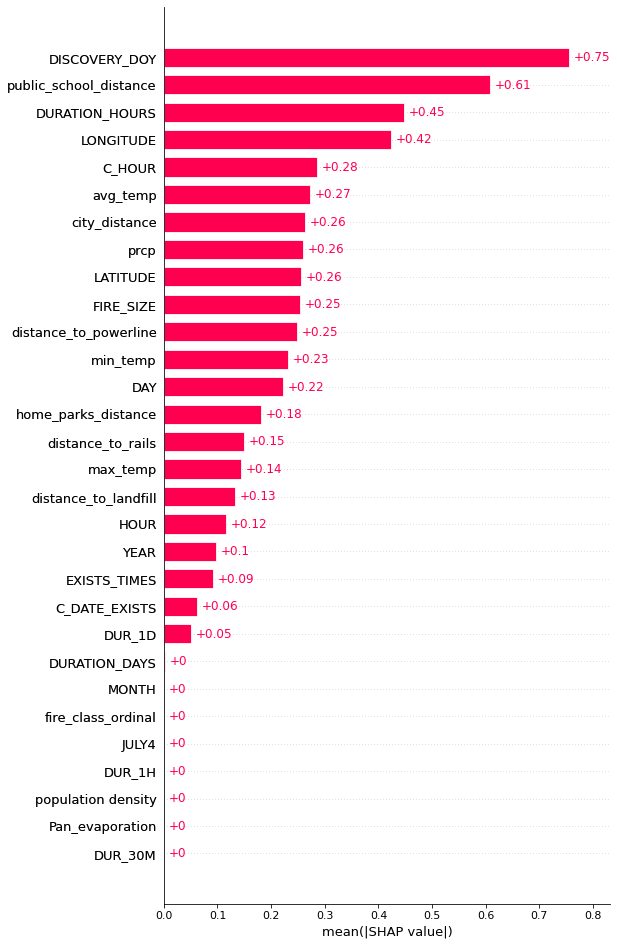

In [ ]:
shap.plots.bar(shap_vals.abs.mean(0),max_display=30)

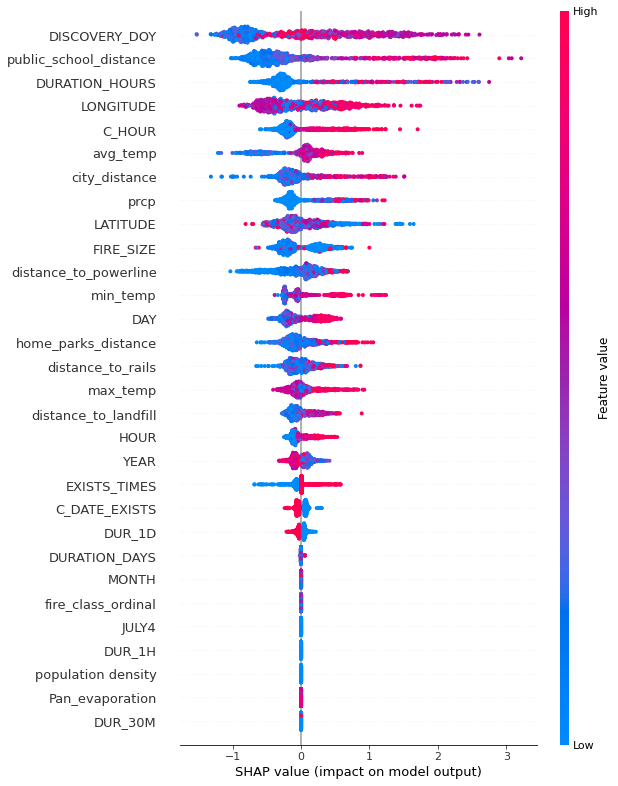

In [ ]:
shap.plots.beeswarm(shap_vals, max_display=30)

In [ ]:
from sklearn.ensemble import GradientBoostingRegressor
gb = GradientBoostingRegressor()
gb.fit(X_train, y_train)

GradientBoostingRegressor()

In [ ]:
X_train.head()

,DISCOVERY_DOY,FIRE_SIZE,LATITUDE,LONGITUDE,DAY,MONTH,YEAR,JULY4,C_DATE_EXISTS,EXISTS_TIMES,...,distance_to_landfill,home_parks_distance,public_school_distance,city_distance,max_temp,min_temp,prcp,Pan_evaporation,avg_temp,fire_class_ordinal
46000,0.347572,-0.032130,0.527209,-0.749912,-0.057042,0.362110,-1.457580,-0.164489,0.949206,1.051555,...,-0.547158,-0.060537,2.237286,1.007531,0.752072,0.477007,3.156581e-14,-5.217543e-15,0.637500,0.189502
298000,2.080988,-0.029042,-1.721151,-0.158226,0.283868,2.054999,-0.106213,-0.164489,0.949206,1.051555,...,-0.642789,-0.163737,-0.730668,-0.561175,-0.471613,-1.209108,-2.600632e-01,-5.217543e-15,-0.861055,0.189502
52500,1.714303,-0.032222,-0.071210,1.123526,-0.057042,1.716421,-1.457580,-0.164489,-1.053512,-0.950972,...,-0.707455,-0.145741,-0.382949,-0.423750,-0.140887,-0.383256,-2.600632e-01,-5.217543e-15,-0.268603,-1.011573
108000,-0.819150,-0.032111,1.102754,1.401487,1.761143,-0.992200,-1.157276,-0.164489,-1.053512,-0.950972,...,-0.821501,-0.139546,-0.683577,-0.014927,-1.695298,-1.862908,-2.600632e-01,-5.217543e-15,-1.836858,0.189502
110500,0.136451,-0.032222,-0.947564,0.560441,1.079324,0.023533,-1.157276,-0.164489,-1.053512,-0.950972,...,-0.827091,-0.145057,-0.438010,0.239449,1.446596,1.612554,-2.600632e-01,-5.217543e-15,1.578452,-1.011573


[]

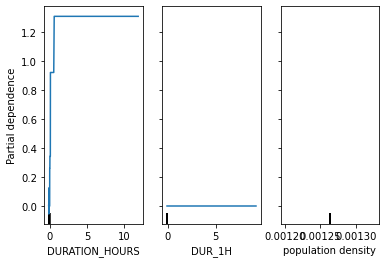

In [ ]:
from sklearn.inspection import PartialDependenceDisplay
PartialDependenceDisplay.from_estimator(gb, X_train,[13,15,17])
plt.plot()

# Outlier Detection

In [ ]:
df = pd.read_csv('datasets/preprocessed_final.csv')

In [ ]:
X = df.drop(columns=['STAT_CAUSE_DESCR', 'STAT_CAUSE_CODE'])
y = df['STAT_CAUSE_DESCR']
X_train, X_test, y_train, y_test = train_test_split(X, y)

In [ ]:
rf = RandomForestClassifier(random_state=0, n_jobs=-1)
rf.fit(X_train, y_train)
print("With Outliers:")
print(classification_report(y_test, rf.predict(X_test)))

With Outliers:
                   precision    recall  f1-score   support

            Arson       0.57      0.53      0.55     23417
         Campfire       0.53      0.34      0.42      6309
         Children       0.41      0.12      0.19      5131
   Debris Burning       0.52      0.73      0.61     35707
    Equipment Use       0.41      0.27      0.33     12314
        Fireworks       0.64      0.43      0.51       933
        Lightning       0.75      0.85      0.80     23209
    Miscellaneous       0.53      0.53      0.53     27185
Missing/Undefined       0.90      0.90      0.90     13844
        Powerline       0.34      0.04      0.07      1146
         Railroad       0.54      0.44      0.49      2803
          Smoking       0.30      0.03      0.05      4374
        Structure       0.52      0.04      0.08       334

         accuracy                           0.60    156706
        macro avg       0.53      0.41      0.42    156706
     weighted avg       0.58      0.60 

In [ ]:
from sklearn.ensemble import IsolationForest

isf = IsolationForest()
isf.fit(X_train)
pd.Series(isf.predict(X_train)).value_counts()

 1    467676
-1      2440
dtype: int64

In [ ]:
res = isf.predict(X_train)

In [ ]:
X_train_without_outliers = X_train.iloc[np.where(res==1)]
y_train_without_outliers = y_train.iloc[np.where(res==1)]

In [ ]:
X_train_without_outliers.shape

(467676, 121)

In [ ]:
rf = RandomForestClassifier(random_state=0, n_jobs=-1)
rf.fit(X_train_without_outliers, y_train_without_outliers)


RandomForestClassifier(n_jobs=-1, random_state=0)

In [ ]:
print("Without Outliers:")
print(classification_report(y_test, rf.predict(X_test)))

Without Outliers:
                   precision    recall  f1-score   support

            Arson       0.57      0.53      0.55     23417
         Campfire       0.53      0.34      0.42      6309
         Children       0.41      0.13      0.19      5131
   Debris Burning       0.52      0.73      0.61     35707
    Equipment Use       0.42      0.27      0.33     12314
        Fireworks       0.63      0.43      0.51       933
        Lightning       0.75      0.86      0.80     23209
    Miscellaneous       0.53      0.53      0.53     27185
Missing/Undefined       0.90      0.91      0.90     13844
        Powerline       0.34      0.04      0.07      1146
         Railroad       0.55      0.45      0.49      2803
          Smoking       0.32      0.03      0.05      4374
        Structure       0.48      0.03      0.06       334

         accuracy                           0.60    156706
        macro avg       0.53      0.41      0.42    156706
     weighted avg       0.58      0.